In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

# Ordinary Differential Equation

## Introduction

In this section, we solve the following second-order ordinary differential equation (ODE) using the **finite difference method**:

$$
\frac{d^2u}{dx^2} + a\frac{du}{dx} = b
$$

where:
- u(x) is the unknown function to be solved,
- a and b are constants,
- x is the independent variable.

This equation arises in various physical and engineering applications, such as heat conduction, fluid flow, and mechanical vibrations.

Analytical solution for the following boundary conditions is given as following

@x=0 => u=0
@x=1 => u=1

$$
𝑢=𝑥+\frac{𝑒−𝑒^{(𝑥+1)}}{𝑒^{(𝑥+1)}−𝑒^𝑥}
$$


In [7]:
def analytical(x):
    """
    Computes the analytical solution for a given input x.
    
    The function is based on the equation:
    
        u(x) = x + (e - e^(x+1)) / (e^(x+1) - e^x)
    
    where e is the base of the natural logarithm (Euler's number).

    Parameters:
    -----------
    x : float or array-like
        The input value(s) at which the analytical solution is evaluated.

    Returns:
    --------
    float or numpy.ndarray
        The computed analytical solution for the given x.

    Notes:
    ------
    - This function utilizes NumPy's `exp()` function for numerical stability.
    - The denominator should not be zero; ensure valid inputs.

    Example:
    --------
    >>> analytical(0)
    1.0
    >>> analytical(np.array([0, 1, 2]))
    array([1. , 1. , 1. ])
    """
    return x+(np.exp(1)-np.exp(x+1))/(np.exp(x+1)-np.exp(x))


In [8]:
x = np.linspace(0,1,100)
u = analytical(x)

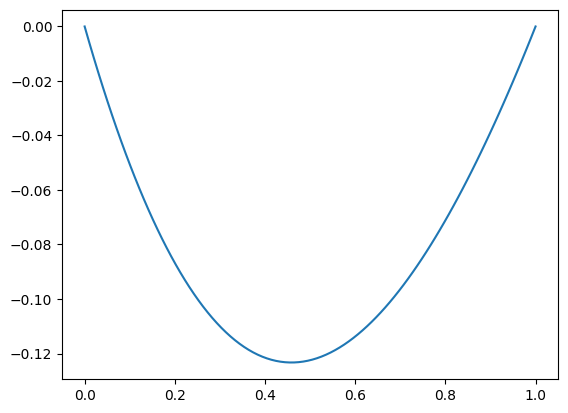

In [9]:
plt.plot(x,u)

## Discretization Using Finite Differences

To approximate the derivatives in the equation, we use the finite difference method. The **second derivative** and **first derivative** can be approximated as follows:

- **First derivative (First-Order Approximation):**
  
$$
\frac{du}{dx} \approx \frac{u_{i+1} - u_{i-1}}{2\Delta x}
$$

- **Second derivative (Central Difference Approximation):**
  
$$
\frac{d^2u}{dx^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}
$$

Substituting these approximations into the differential equation results in a system of algebraic equations, which we solve numerically.

## Boundary Condition Implementation

To obtain a well-posed numerical problem, we impose appropriate **boundary conditions**:
- **Dirichlet boundary conditions:** $$\( u(x_0) = u_0 \), \( u(x_N) = u_N \)$$
- **Neumann boundary conditions:** $$\( \frac{du}{dx} \)$$ specified at boundaries
- **Mixed boundary conditions:** A combination of Dirichlet and Neumann conditions

In the next sections, we will derive the discrete system, construct the coefficient matrix, and solve for \( u(x) \) at discrete points.

In [11]:
N = 4

In [12]:
dx = 1./N

In [13]:
m0 = 1/2/dx-3/dx**2
mm = -2/dx**2
mp = 1/dx**2+1/2/dx
mn = -1/2/dx+1/dx**2
mL = -3/dx**2-1/2/dx

In [14]:
A = np.zeros((N,N))
b = np.ones((N,1))

In [15]:
for i in range(N):
    if i==0:
        A[i,i] = m0
        A[i,i+1] = mp
    elif i==N-1:
        A[i,i] = mL
        A[i,i-1] = mn
    else:
        A[i,i-1] = mn
        A[i,i] = mm
        A[i,i+1] = mp

In [16]:
uc = np.linalg.solve(A,b)

In [17]:
xn = np.linspace(0,1,N+1)

In [18]:
xc = (xn[:-1]+xn[1:])/2

In [19]:
xc

array([0.125, 0.375, 0.625, 0.875])

NameError: name 'xc' is not defined

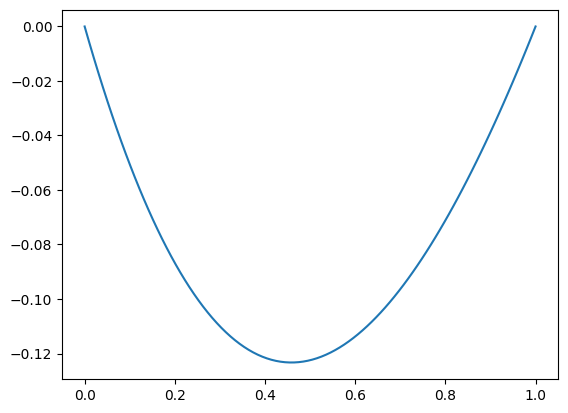

In [10]:
plt.plot(x,u)
plt.scatter(xc,uc)
plt.show()

In [22]:
def finite(N):
    
    dx = 1./N
    
    m0 = 1/2/dx-3/dx**2
    mm = -2/dx**2
    mp = 1/dx**2+1/2/dx
    mn = -1/2/dx+1/dx**2
    mL = -3/dx**2-1/2/dx

    A = np.zeros((N,N))
    b = np.ones((N,1))

    for i in range(N):
        if i==0:
            A[i,i] = m0
            A[i,i+1] = mp
        elif i==N-1:
            A[i,i] = mL
            A[i,i-1] = mn
        else:
            A[i,i-1] = mn
            A[i,i] = mm
            A[i,i+1] = mp

    uc = np.linalg.solve(A,b)
    xn = np.linspace(0,1,N+1)
    xc = (xn[:-1]+xn[1:])/2

    return xc,uc

In [27]:
xc,uc = finite(20)

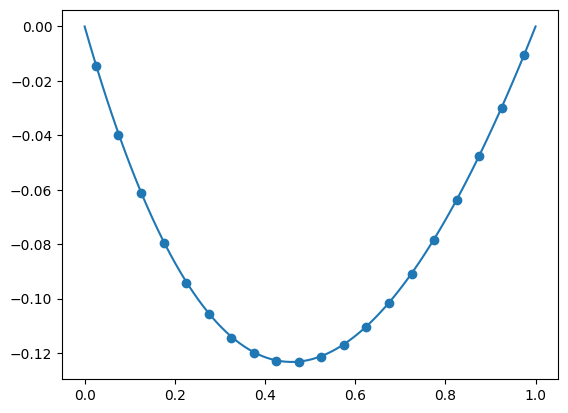

In [28]:
plt.plot(x,u)
plt.scatter(xc,uc)